In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns =None
pd.options.display.max_rows= 150

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/.DS_Store
input/netflix_titles.csv
input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv
input/country-codes/.DS_Store
input/country-codes/country_code.csv
input/goodbooks-10k/book_tags.csv
input/goodbooks-10k/tags.csv
input/goodbooks-10k/ratings.csv
input/goodbooks-10k/to_read.csv
input/goodbooks-10k/books.csv
input/titanic/test.csv
input/titanic/train.csv
input/titanic/gender_submission.csv
input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
input/students-performance-in-exams/StudentsPerformance.csv


Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [3]:
data= pd.read_csv("input/netflix_titles.csv")

In [4]:
data.head(5)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

<h2>Understanding what content is available in different countries</h2>

In [5]:
data['listed_in'].value_counts()

Documentaries                                                  299
Stand-Up Comedy                                                273
Dramas, International Movies                                   248
Dramas, Independent Movies, International Movies               186
Comedies, Dramas, International Movies                         174
                                                              ... 
Action & Adventure, Anime Features, Classic Movies               1
Classic Movies, Dramas, Music & Musicals                         1
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Action & Adventure, International Movies, Thrillers              1
Comedies, Music & Musicals, Romantic Movies                      1
Name: listed_in, Length: 461, dtype: int64

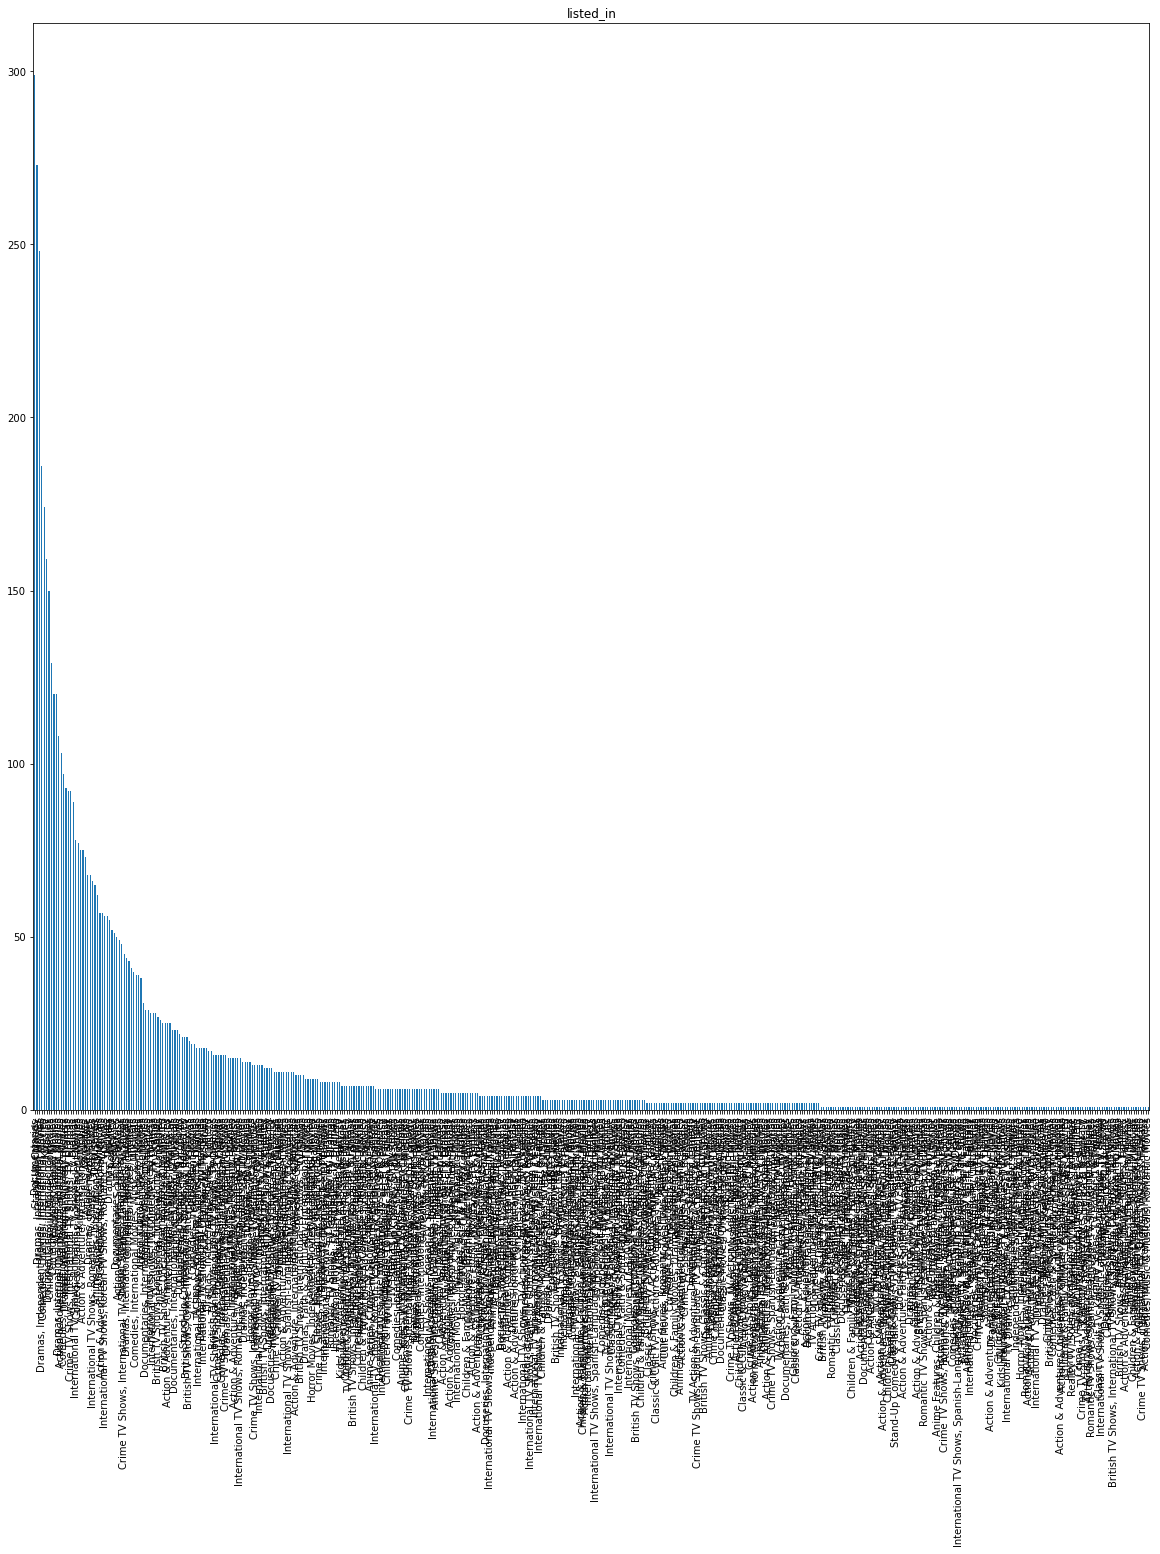

In [6]:
data['listed_in'].value_counts().plot(kind='bar',title='listed_in',figsize=(20,20))
plt.show()

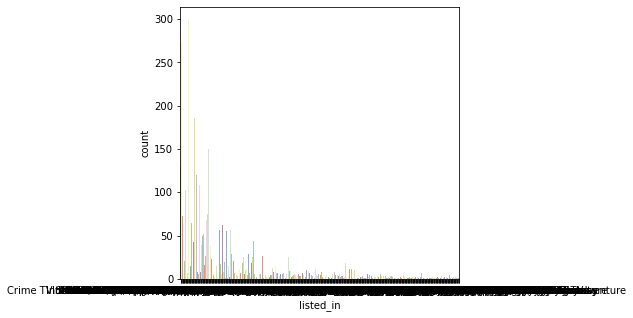

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sb.countplot(x="listed_in",ax=ax, data=data,palette="Set3")